In [261]:
# EDA
# import lib
# shape, dtype, Null Values, Imbalance, Data 

In [262]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
data = pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [264]:
records = pd.read_csv('credit_record.csv')
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [265]:
print("Number of datapoints in data:",len(data))
print("Number of datapoints in records:",len(records))

Number of datapoints in data: 438557
Number of datapoints in records: 1048575


In [266]:
print("Number of unique IDs in data:",len(data.ID.unique()))
print("Number of unique IDs in records:",len(records.ID.unique()))

Number of unique IDs in data: 438510
Number of unique IDs in records: 45985


In [267]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

In [268]:
data_duplicates = data.iloc[:, 1:].duplicated().sum()
print("Data duplicates: ", (100* data_duplicates/len(data)))

rec_duplicates = records.duplicated().sum()
print("Records dupliates", (100* rec_duplicates/len(records)))

Data duplicates:  79.45877046769291
Records dupliates 0.0


In [269]:
data_duplicates, rec_duplicates

(348472, 0)

In [270]:
data = data.drop_duplicates(subset = data.columns[1:], keep='first')

In [271]:
data.shape

(90085, 18)

In [272]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

In [273]:
data.nunique()

ID                     90085
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN              12
AMT_INCOME_TOTAL         866
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH             16379
DAYS_EMPLOYED           9406
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           13
dtype: int64

In [274]:
data.nunique().reset_index(name = 'Num_unique')

,index,Num_unique
0,ID,90085
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
4,CNT_CHILDREN,12
5,AMT_INCOME_TOTAL,866
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5
8,NAME_FAMILY_STATUS,5
9,NAME_HOUSING_TYPE,6


In [275]:
data.nunique().reset_index(name='Num_unique').rename(columns={'index':'Column_name'}).sort_values('Num_unique')

,Column_name,Num_unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [276]:
records.nunique().reset_index(name='Num_unique').rename(columns={'index':'Column_name'}).sort_values('Num_unique')

,Column_name,Num_unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [277]:
data.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [278]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [279]:
data.shape

(90085, 17)

In [280]:
# Missing values

data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

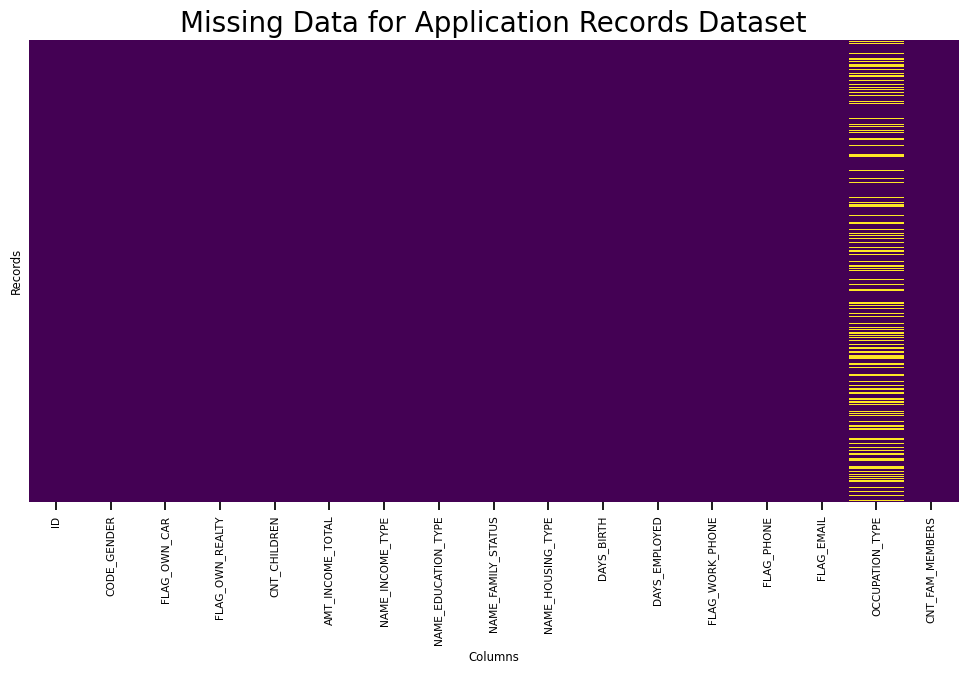

In [281]:
missing_data = data.isnull()

plt.figure(figsize = (12,6))
sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap= 'viridis')
plt.title("Missing Data for Application Records Dataset", fontsize=20)
plt.xlabel("Columns")
plt.ylabel('Records')
plt.show()

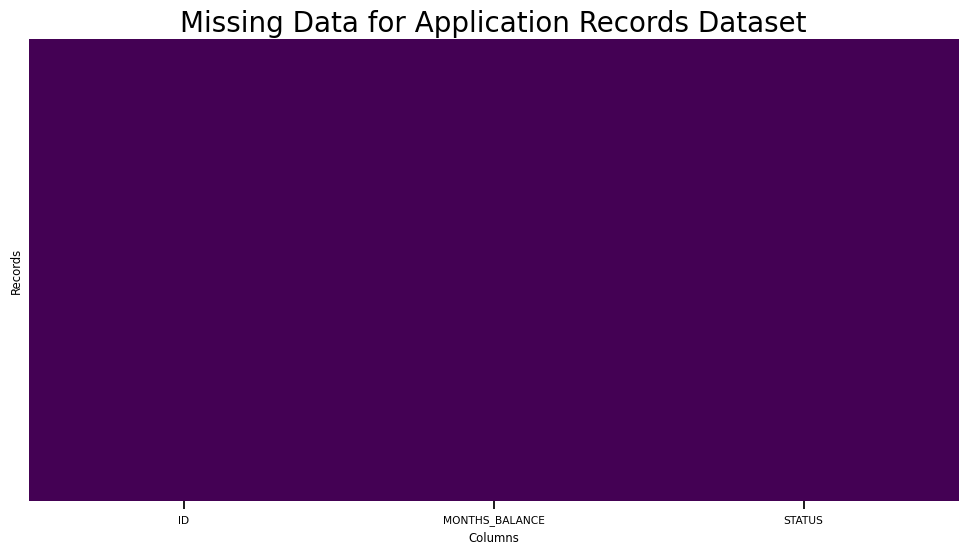

In [282]:
missing_records = records.isnull()

plt.figure(figsize = (12,6))
sns.heatmap(missing_records, cbar=False, yticklabels=False, cmap= 'viridis')
plt.title("Missing Data for Application Records Dataset", fontsize=20)
plt.xlabel("Columns")
plt.ylabel('Records')
plt.show()

In [283]:
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [284]:
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [285]:
# Target column

In [286]:
records['STATUS'].nunique()

8

In [287]:
records['target'] = records['STATUS']

In [288]:
records['target'].replace('X',0, inplace=True)
records['target'].replace('C',0, inplace=True)
records['target'] = records['target'].astype(int)

In [289]:
records['target'].nunique()

6

In [290]:
records.loc[records['target']>=1, 'target']=1 # 0 -> No Risk, 1-> Risk

In [291]:
records['target'].nunique()

2

In [292]:
df = pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [293]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [294]:
new_df = pd.merge(data, df, how='inner', on=['ID'])

In [295]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [296]:
new_df.shape

(9709, 18)

In [297]:
records.head()

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [298]:
start_df = pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns = {'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [299]:
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [300]:
new_df = pd.merge(new_df, start_df, how='inner', on=['ID'])

In [301]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5


In [302]:
data['DAYS_BIRTH']

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

In [303]:
new_df['AGE_YEARS'] = round(-new_df['DAYS_BIRTH']/365.25,0)

In [304]:
new_df['AGE_YEARS']

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64

In [305]:
new_df.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [306]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0


In [307]:
new_df['UNEMPLOYED'] = 0
new_df.loc[-new_df['DAYS_EMPLOYED']<0, 'UNEMPLOYED'] = 1

In [308]:
new_df['DAYS_EMPLOYED']

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

In [309]:
new_df['YEARS_EMPLOYED'] = round(-new_df['DAYS_EMPLOYED']/365.25,0)

In [310]:
new_df['YEARS_EMPLOYED']

0         12.0
1          3.0
2          8.0
3      -1000.0
4          2.0
         ...  
9704       1.0
9705       7.0
9706       5.0
9707       4.0
9708       3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

In [311]:
new_df.loc[new_df['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED'] = 0

In [312]:
new_df['YEARS_EMPLOYED']

0       12.0
1        3.0
2        8.0
3        0.0
4        2.0
        ... 
9704     1.0
9705     7.0
9706     5.0
9707     4.0
9708     3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

In [313]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [314]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [315]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'ACCOUNT_LENGTH', 'AGE_YEARS', 'UNEMPLOYED',
       'YEARS_EMPLOYED'],
      dtype='object')

In [316]:
new_df = new_df.rename(columns= { 'CODE_GENDER':'Gender', 'FLAG_OWN_CAR': 'Own_car' , 
                                 'FLAG_OWN_REALTY':'Own_Property', 'CNT_CHILDREN':'Num_children',
       'AMT_INCOME_TOTAL': 'Total_income', 'NAME_INCOME_TYPE':'Income_type', 'NAME_EDUCATION_TYPE':'Education_type',
       'NAME_FAMILY_STATUS':'Family_status', 'NAME_HOUSING_TYPE':'Housing_type', 'FLAG_WORK_PHONE':'Work_phone',
       'FLAG_PHONE':'Phone', 'FLAG_EMAIL':'Email', 'OCCUPATION_TYPE':'Occupation_type', 'CNT_FAM_MEMBERS':'Num_family',
       'target':'Target', 'ACCOUNT_LENGTH':'Account_lenght', 'AGE_YEARS': 'Age', 'UNEMPLOYED':'Unemployed',
       'YEARS_EMPLOYED':'Years_employed'
    
})

In [317]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [318]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_Property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_lenght       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [319]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']
sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

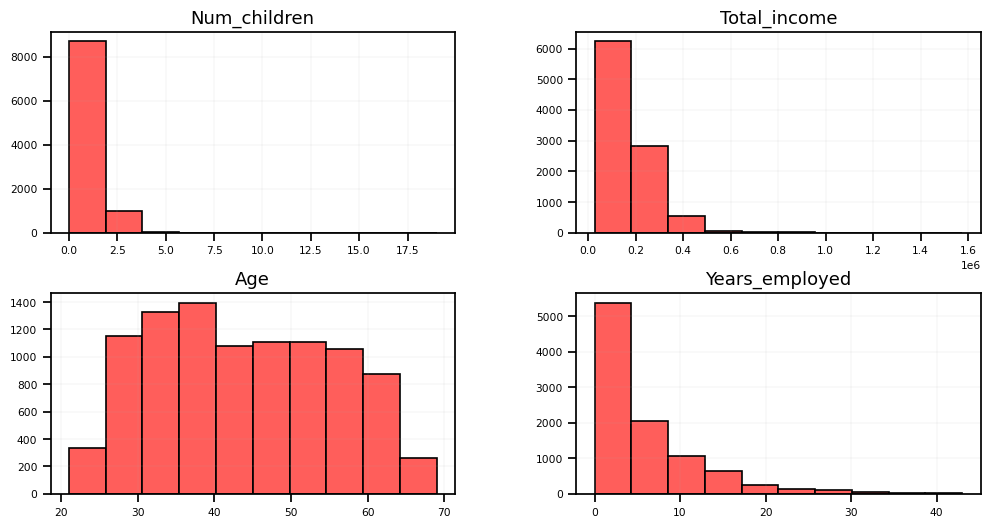

In [320]:
plt.figure(figsize = (10,10))

cols_to_plot = ['Num_children', 'Total_income', 'Age', 'Years_employed']

new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)

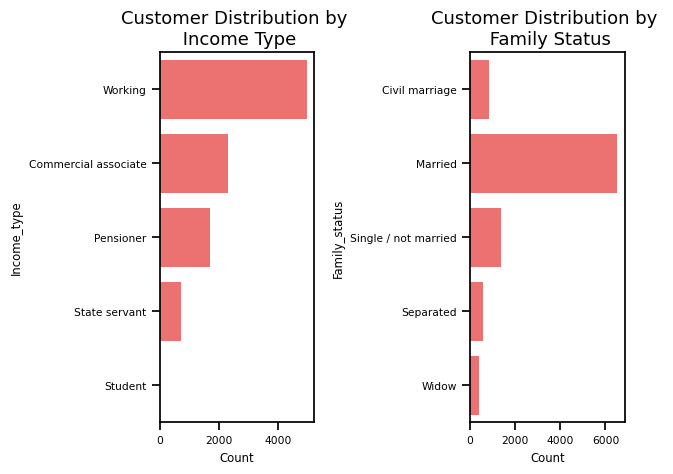

In [321]:
ig, axes = plt.subplots(1,2)
g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Income Type")
g1.set_xlabel("Count")
g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Family Status")
g2.set_xlabel("Count")
fig.set_size_inches(14,5)
plt.tight_layout()

plt.show()

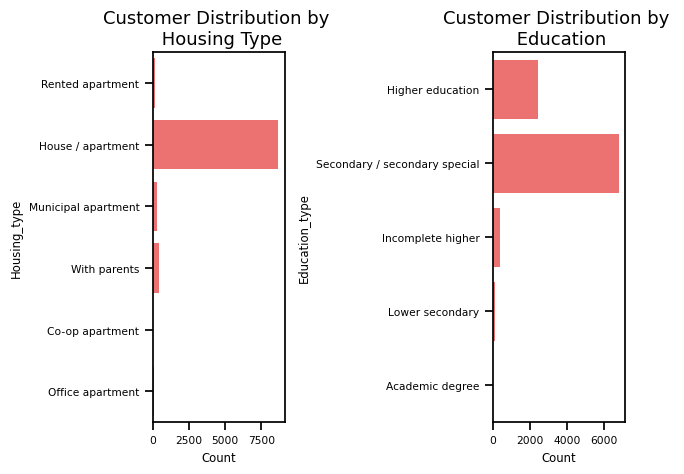

In [322]:
ig, axes = plt.subplots(1,2)
g1=sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Housing Type")
g1.set_xlabel("Count")
g2=sns.countplot(y=new_df.Education_type,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Education")
g2.set_xlabel("Count")
fig.set_size_inches(14,5)
plt.tight_layout()

plt.show()

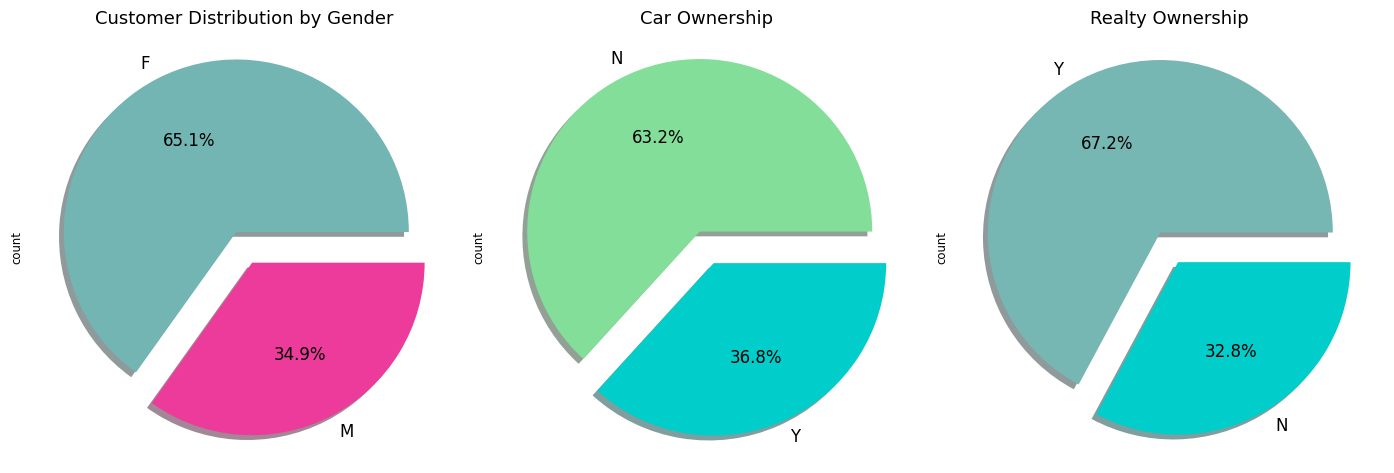

In [323]:
fig, axes = plt.subplots(1,3)
g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")
g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")
g3= new_df['Own_Property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")
fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [324]:
## Encoding

In [325]:
object_columns = new_df.columns[new_df.dtypes == 'object'].tolist()

for i in object_columns:
    print(f'Column {i}', new_df[i].nunique())

Column Gender 2
Column Own_car 2
Column Own_Property 2
Column Income_type 5
Column Education_type 5
Column Family_status 5
Column Housing_type 6
Column Occupation_type 19


In [326]:
for i in new_df.columns[(new_df.dtypes=='object').values].tolist():
    print(new_df[i].value_counts())
    print('-------------------------------------')

Gender
F    6323
M    3386
Name: count, dtype: int64
-------------------------------------
Own_car
N    6139
Y    3570
Name: count, dtype: int64
-------------------------------------
Own_Property
Y    6520
N    3189
Name: count, dtype: int64
-------------------------------------
Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-------------------------------------
Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-------------------------------------
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64
-------------------------------------
Housing

In [327]:
new_df['Gender'] = new_df["Gender"].replace(['F','M'],[0,1])
new_df['Own_car'] = new_df["Own_car"].replace(['Y','N'],[1,0])
new_df['Own_Property'] = new_df["Own_Property"].replace(['Y','N'],[1,0])

In [328]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [329]:
new_df['Is_working'] = new_df["Income_type"].replace(["Working", "Commercial associate", "State servant", "Pensioner", "Student"], [1,1,1,0,0])

In [330]:
new_df['Marital_status'] = new_df["Family_status"].replace(["Married", "Civil marriage", "Single / not married", "Separated", "Widow"], [1,1,0,0,0])

In [331]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [332]:
housing_type = { 'House / apartment': 'House / apartment',
                'With parents': 'With parents',
                'Municipal apartment' : 'House / apartment',
                'Rented apartment' : 'House / apartment',
                'Office apartment' : 'House / apartment',
                'Co-op apartment' : 'House / apartment'
               }

In [333]:
new_df['Housing_type'] = new_df['Housing_type'].map(housing_type)

In [334]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [335]:
family_status = { 'Married' : 'Married',
'Single / not married' : 'Single',
'Civil marriage': 'Married',
'Separated': 'Single',
'Widow':'Single'}

In [336]:
new_df['Family_status'] = new_df['Family_status'].map(family_status)

In [337]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [338]:
income_type = {'Working' : 'Working',
'Commercial associate' : 'Working',
'Pensioner' : 'Pensioner',
'State servant' : 'Working',
'Student' : 'Student'         
}
new_df['Income_type'] = new_df['Income_type'].map(income_type)

In [339]:
education_type = {'Secondary / secondary special' : 'secondary',
'Higher education': 'Higher education',
'Incomplete higher': 'Higher education',
'Lower secondary' : 'secondary',
'Academic degree': 'Academic degree'}
new_df['Education_type'] = new_df['Education_type'].map(education_type)

In [340]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [341]:
new_df['Household_Size'] = new_df['Num_children'] + new_df['Marital_status'].apply(lambda x:2 if x==1 else 1)

In [342]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,0,5,46.0,0,2.0,1,1,2


In [343]:
# Outliers

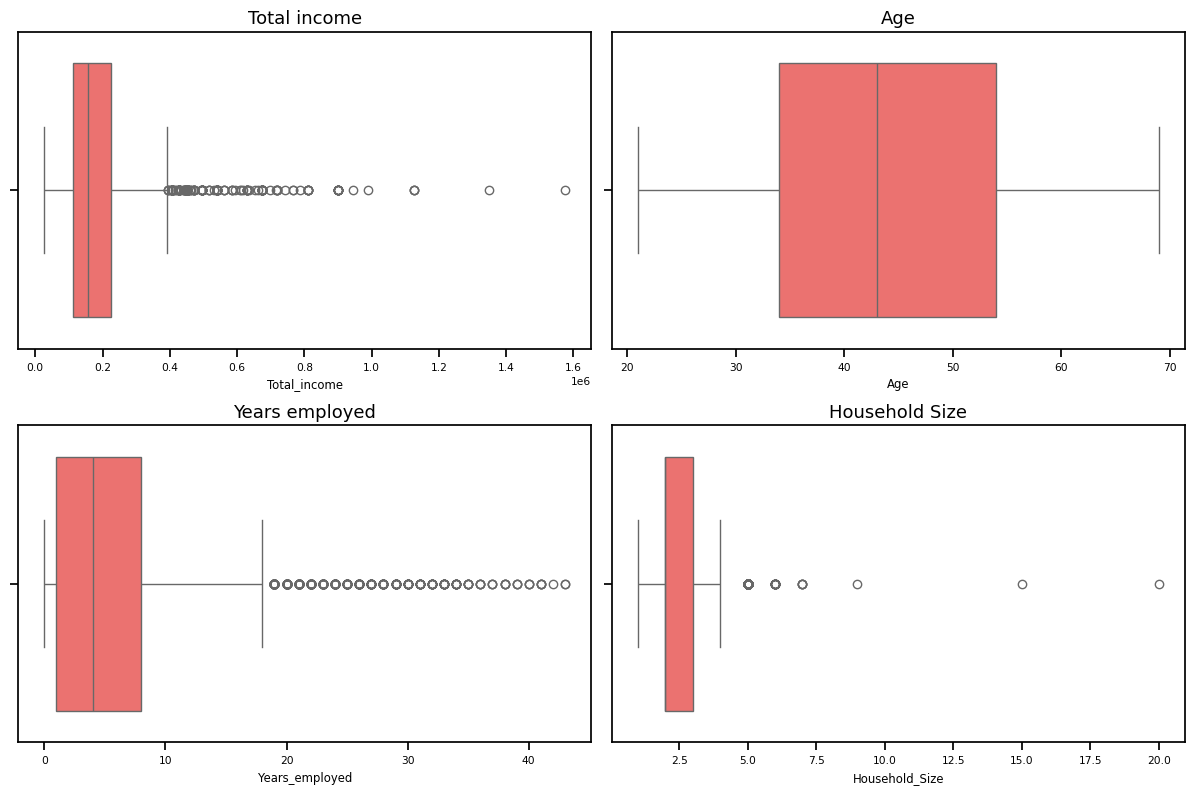

In [344]:
numerical_cols = ['Total_income', 'Age', 'Years_employed', 'Household_Size']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=new_df[col])
    plt.title(col.replace("_"," "))

plt.tight_layout()
plt.show()

In [345]:
new_df['Years_employed'].value_counts()

Years_employed
0.0     1978
1.0      991
2.0      851
3.0      824
4.0      735
5.0      645
6.0      510
7.0      463
8.0      418
9.0      354
10.0     306
11.0     228
12.0     185
15.0     178
13.0     164
14.0     140
16.0      87
17.0      76
19.0      69
18.0      68
21.0      57
20.0      57
22.0      45
23.0      38
24.0      38
25.0      28
26.0      28
28.0      23
27.0      20
29.0      19
30.0      14
31.0      11
33.0      11
32.0      11
34.0       9
35.0       6
38.0       4
41.0       4
36.0       4
37.0       3
39.0       3
40.0       3
43.0       2
42.0       1
Name: count, dtype: int64

In [346]:
new_df['Household_Size'].value_counts()

Household_Size
2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

In [347]:
new_df[(new_df['Years_employed']==43)]

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status,Household_Size
7142,5112905,0,0,1,0,180000.0,Working,secondary,Married,House / apartment,...,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,2
9328,5148702,0,0,1,0,126000.0,Working,secondary,Married,House / apartment,...,Core staff,2.0,0,57,62.0,0,43.0,1,1,2


<Axes: ylabel='Num_children'>

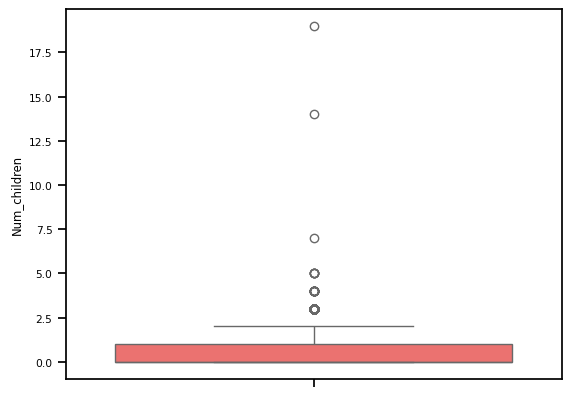

In [348]:
sns.boxplot(new_df['Num_children'])

In [349]:
higher_bound = new_df['Num_children'].quantile(0.999)
print("Higher Bound:", higher_bound)
lower_bound = new_df['Num_children'].quantile(0.001)
print("Lower bound:", lower_bound)

Higher Bound: 4.0
Lower bound: 0.0


In [350]:
new_df = new_df[(new_df['Num_children']>=lower_bound) & (new_df['Num_children']<=higher_bound)]

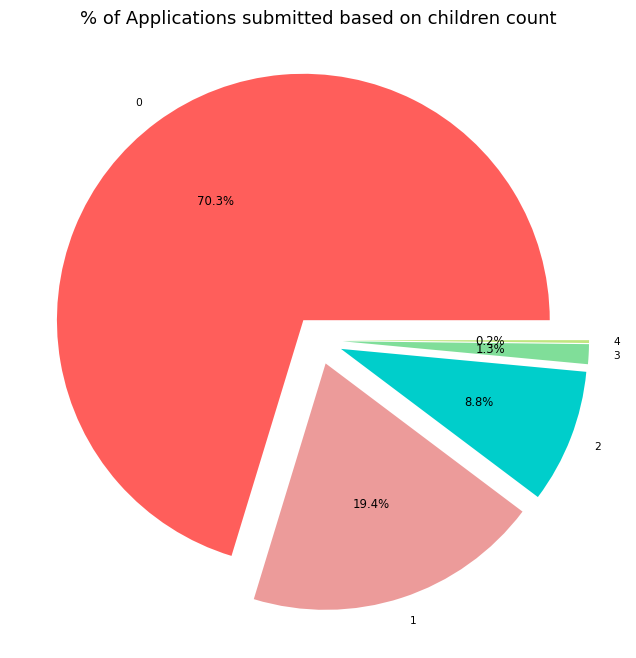

In [351]:
plt.figure(figsize=(8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index, explode=[0.1, 0.1, 0.1,0.1,0.1], autopct='%1.1f%%')
plt.title("% of Applications submitted based on children count")
plt.show()

In [352]:
new_df.head()

,ID,Gender,Own_car,Own_Property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_lenght,Age,Unemployed,Years_employed,Is_working,Marital_status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,0,5,46.0,0,2.0,1,1,2


In [353]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_Property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_lenght', 'Age', 'Unemployed',
       'Years_employed', 'Is_working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [354]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_Property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_lenght', 'Age', 'Unemployed',
       'Years_employed', 'Is_working', 'Marital_status', 'Household_Size', 'Target']]

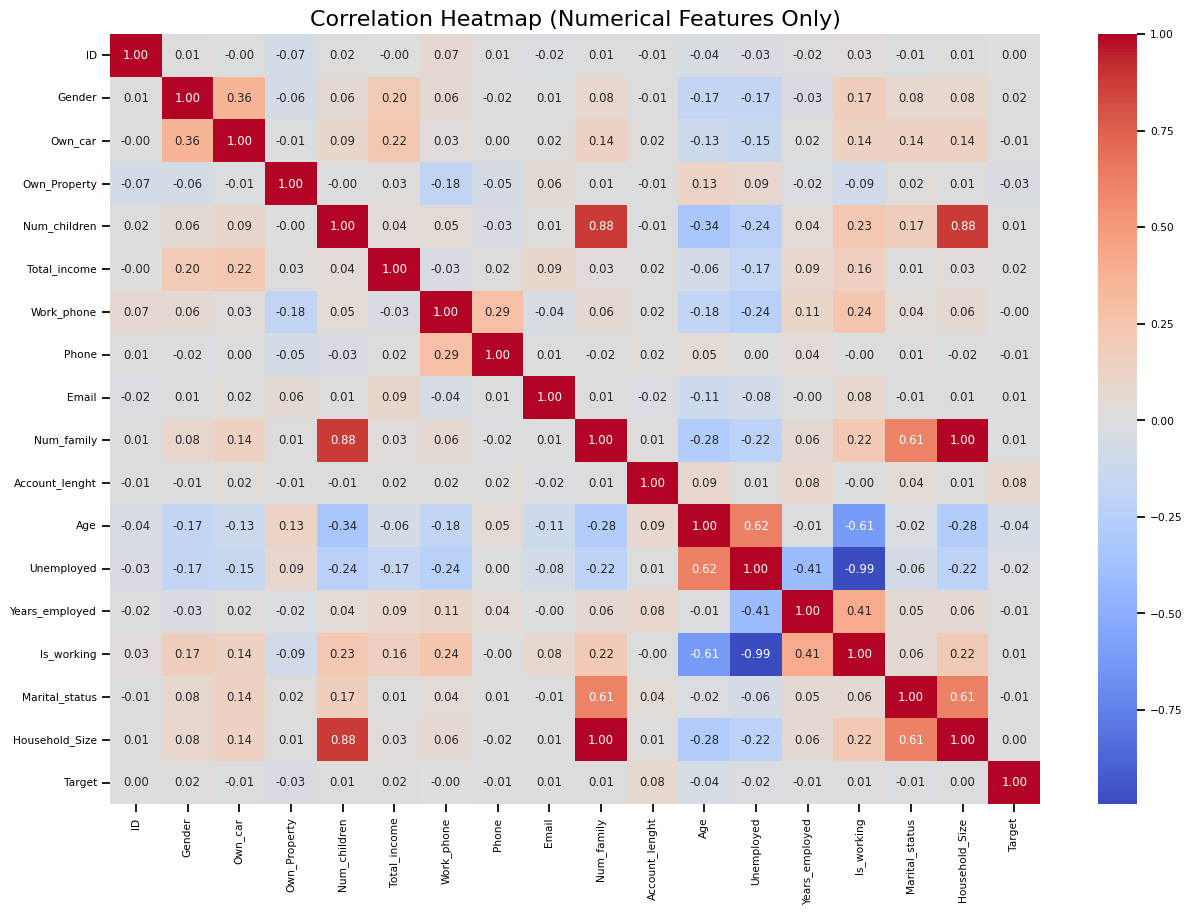

In [355]:
# Correlation
numerical_df = new_df.select_dtypes(include=['number'])

corr = numerical_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features Only)', fontsize=16)
plt.show()

In [356]:
# Handling multicollinearity
new_df.drop('Num_family', axis=1, inplace=True)

In [357]:
new_df.drop('ID', axis=1, inplace=True)

In [358]:
new_df.drop('Num_children', axis=1, inplace=True)

In [359]:
new_df.drop('Email', axis=1, inplace=True)

In [360]:
new_df.drop('Phone', axis=1, inplace=True)

In [361]:
new_df.drop('Work_phone', axis=1, inplace=True)

In [362]:
new_df.drop('Is_working', axis=1, inplace=True)

In [363]:
new_df.drop('Occupation_type', axis=1, inplace=True)

In [364]:
new_df.drop('Family_status', axis=1, inplace=True)

In [365]:
new_df.drop('Account_lenght', axis=1, inplace=True)

In [366]:
new_df.shape

(9701, 13)

In [367]:
new_df

,Gender,Own_car,Own_Property,Total_income,Income_type,Education_type,Housing_type,Age,Unemployed,Years_employed,Marital_status,Household_Size,Target
0,1,1,1,427500.0,Working,Higher education,House / apartment,33.0,0,12.0,1,2,1
1,1,1,1,112500.0,Working,secondary,House / apartment,59.0,0,3.0,1,2,0
2,0,0,1,270000.0,Working,secondary,House / apartment,52.0,0,8.0,0,1,0
3,0,0,1,283500.0,Pensioner,Higher education,House / apartment,62.0,1,0.0,0,1,0
4,1,1,1,270000.0,Working,Higher education,House / apartment,46.0,0,2.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,Pensioner,secondary,House / apartment,56.0,0,1.0,1,2,1
9705,0,0,1,112500.0,Working,secondary,House / apartment,43.0,0,7.0,1,2,1
9706,1,1,1,90000.0,Working,secondary,House / apartment,52.0,0,5.0,1,2,1
9707,0,0,1,157500.0,Pensioner,Higher education,House / apartment,34.0,0,4.0,1,2,1


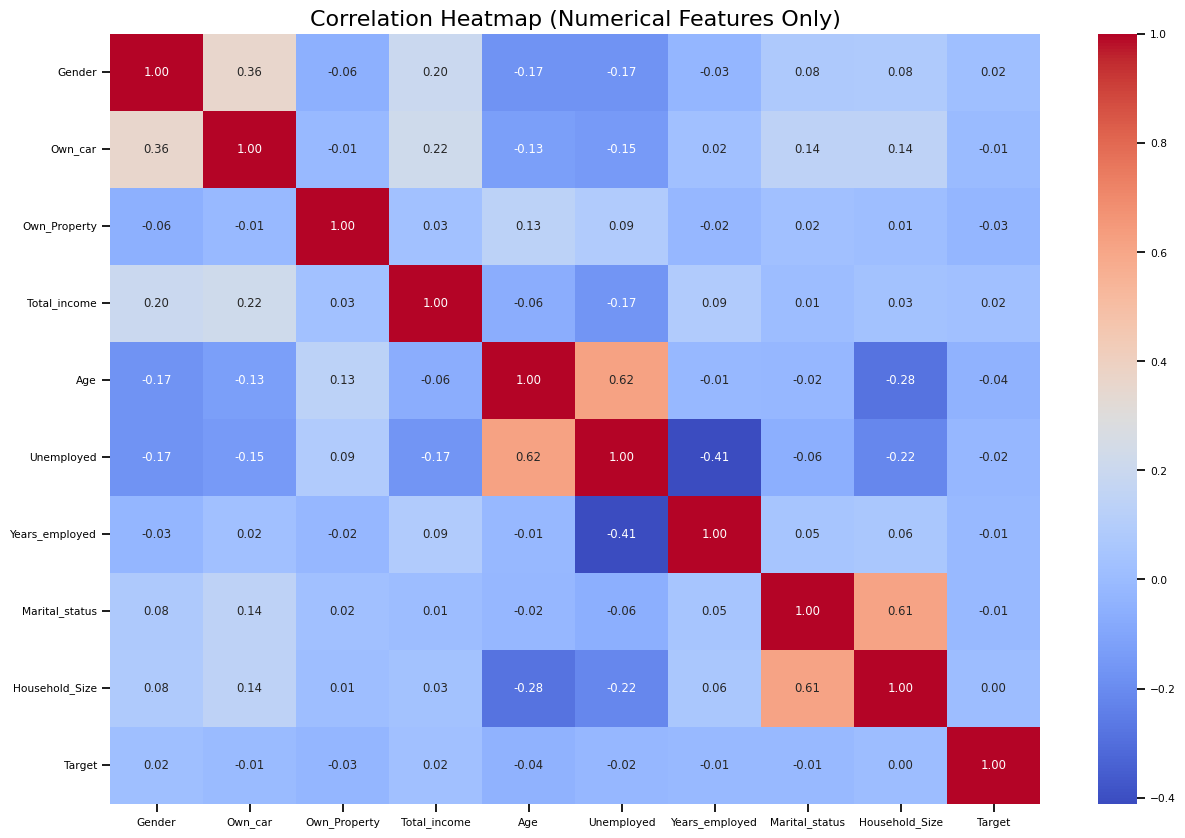

In [368]:
# Correlation
numerical_df = new_df.select_dtypes(include=['number'])

corr = numerical_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features Only)', fontsize=16)
plt.show()

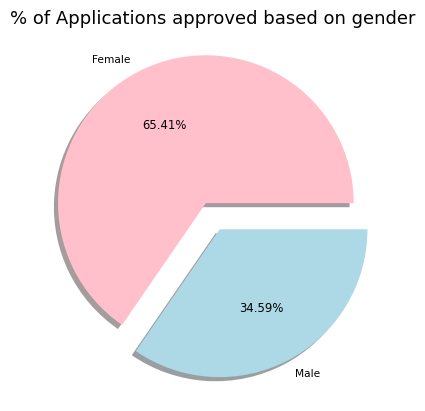

In [369]:
plt.pie(new_df[new_df['Target']==0]['Gender'].value_counts(), explode=[0.1,0.1], shadow=True, labels=['Female', 'Male'], autopct='%1.2f%%', colors=['pink','lightblue'])
plt.title('% of Applications approved based on gender')
plt.show()

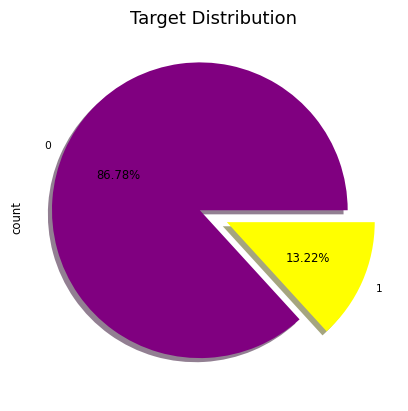

In [370]:
# Imbalance is observed
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1], shadow=True, autopct='%1.2f%%', colors=['purple', 'yellow'])
plt.title('Target Distribution')
plt.show()

In [371]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9701 entries, 0 to 9708
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          9701 non-null   int64  
 1   Own_car         9701 non-null   int64  
 2   Own_Property    9701 non-null   int64  
 3   Total_income    9701 non-null   float64
 4   Income_type     9701 non-null   object 
 5   Education_type  9701 non-null   object 
 6   Housing_type    9701 non-null   object 
 7   Age             9701 non-null   float64
 8   Unemployed      9701 non-null   int64  
 9   Years_employed  9701 non-null   float64
 10  Marital_status  9701 non-null   int64  
 11  Household_Size  9701 non-null   int64  
 12  Target          9701 non-null   int32  
dtypes: float64(3), int32(1), int64(6), object(3)
memory usage: 1023.2+ KB


In [372]:
colname = []
for x in new_df.columns:
    if new_df[x].dtype == 'object':
        colname.append(x)

colname

['Income_type', 'Education_type', 'Housing_type']

In [373]:
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([1, 0], dtype=int64)}
{'Own_Property': array([1, 0], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   65250. ,  184500. ,
        103500. ,  162000. ,  165150. ,   54000. ,  2430

In [374]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    new_df[x] = le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Pensioner': 0, 'Student': 1, 'Working': 2}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'secondary': 2}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}


In [375]:
new_df.head()

,Gender,Own_car,Own_Property,Total_income,Income_type,Education_type,Housing_type,Age,Unemployed,Years_employed,Marital_status,Household_Size,Target
0,1,1,1,427500.0,2,1,0,33.0,0,12.0,1,2,1
1,1,1,1,112500.0,2,2,0,59.0,0,3.0,1,2,0
2,0,0,1,270000.0,2,2,0,52.0,0,8.0,0,1,0
3,0,0,1,283500.0,0,1,0,62.0,1,0.0,0,1,0
4,1,1,1,270000.0,2,1,0,46.0,0,2.0,1,2,0


In [376]:
X = new_df.iloc[:, 0:-1]
Y = new_df.iloc[:, -1]

In [377]:
print(X.shape)
print(Y.shape)

(9701, 12)
(9701,)


In [378]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [379]:
X

array([[ 1.3665918 ,  1.31164592,  0.69930346, ...,  0.99465969,
         0.56381876, -0.19512984],
       [ 1.3665918 ,  1.31164592,  0.69930346, ..., -0.42158557,
         0.56381876, -0.19512984],
       [-0.7317474 , -0.76240087,  0.69930346, ...,  0.36521735,
        -1.7736196 , -1.3086325 ],
       ...,
       [ 1.3665918 ,  1.31164592,  0.69930346, ..., -0.1068644 ,
         0.56381876, -0.19512984],
       [-0.7317474 , -0.76240087,  0.69930346, ..., -0.26422498,
         0.56381876, -0.19512984],
       [ 1.3665918 , -0.76240087,  0.69930346, ..., -0.42158557,
        -1.7736196 , -1.3086325 ]])

In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [383]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(7760, 12)
(7760,)
(1941, 12)
(1941,)


In [385]:
# Modeling

In [387]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

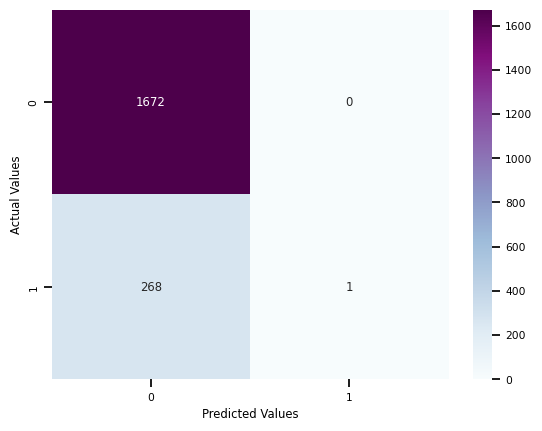

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       1.00      0.00      0.01       269

    accuracy                           0.86      1941
   macro avg       0.93      0.50      0.47      1941
weighted avg       0.88      0.86      0.80      1941

Accuracy of the model:  0.8619268418341062


In [389]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [403]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                                metric = 'euclidean')
model_KNN.fit(X_train, Y_train)
Y_pred = model_KNN.predict(X_test)

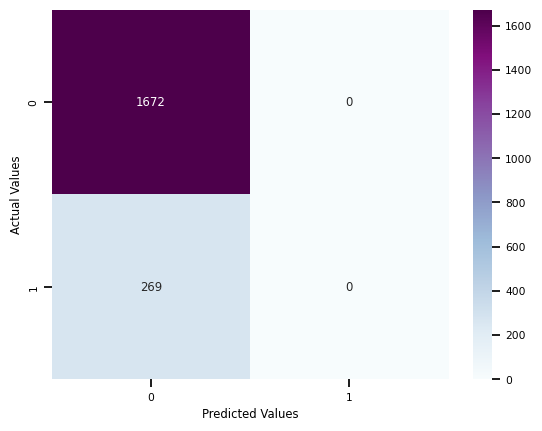

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [405]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ", acc)

In [407]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=0.1, C=1)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

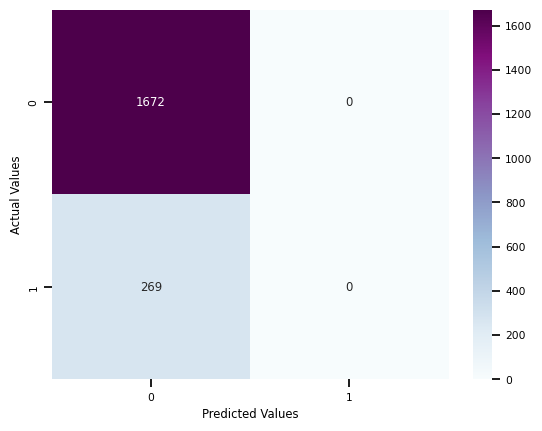

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [411]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [413]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=10)

model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

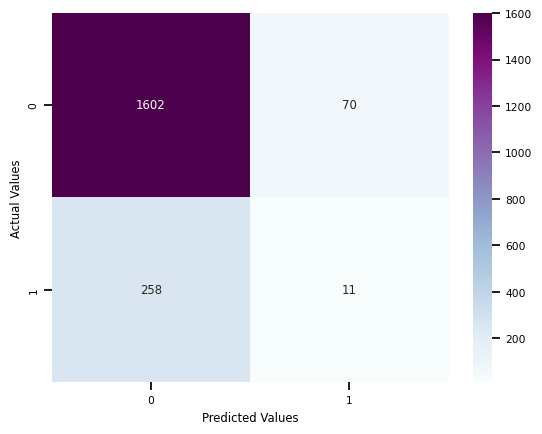

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1672
           1       0.14      0.04      0.06       269

    accuracy                           0.83      1941
   macro avg       0.50      0.50      0.48      1941
weighted avg       0.76      0.83      0.79      1941

Accuracy of the model:  0.8310149407521896


In [415]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [417]:
y = new_df["Target"]
x = new_df.drop(['Target'], axis=1)

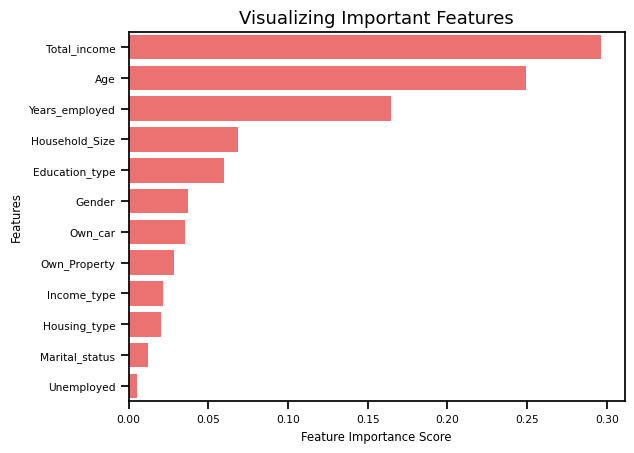

In [421]:
feature_imp = pd.Series(model_DecisionTree.feature_importances_, index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [423]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=50, random_state=10)

model_RandomForest.fit(X_train, Y_train)
Y_pred = model_RandomForest.predict(X_test)

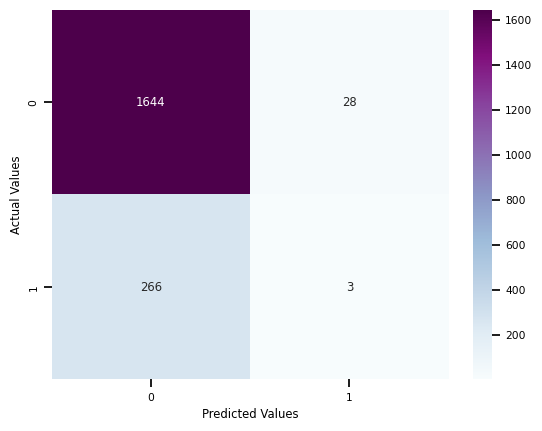

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1672
           1       0.10      0.01      0.02       269

    accuracy                           0.85      1941
   macro avg       0.48      0.50      0.47      1941
weighted avg       0.75      0.85      0.79      1941

Accuracy of the model:  0.848531684698609


In [425]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

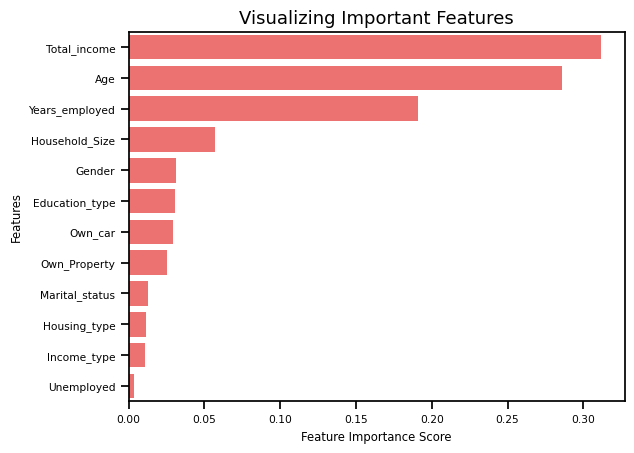

In [429]:
feature_imp = pd.Series(model_RandomForest.feature_importances_, index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [431]:
new_df.drop(["Household_Size"], axis=1, inplace=True)

In [433]:
new_df.drop(["Own_car"], axis=1, inplace=True)

In [435]:
new_df.drop(["Own_Property"], axis=1, inplace=True)

In [437]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50, random_state=10)

model_ExtraTrees.fit(X_train, Y_train)
Y_pred = model_ExtraTrees.predict(X_test)

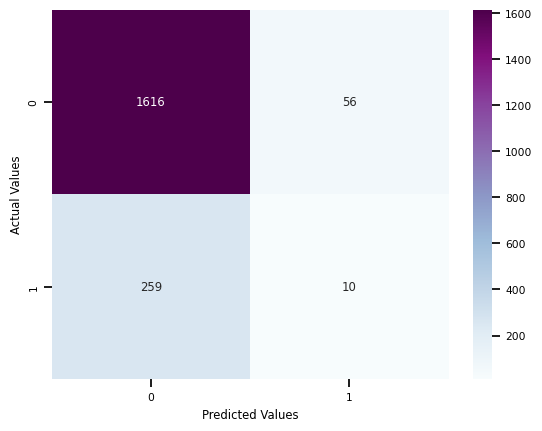

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1672
           1       0.15      0.04      0.06       269

    accuracy                           0.84      1941
   macro avg       0.51      0.50      0.49      1941
weighted avg       0.76      0.84      0.79      1941

Accuracy of the model:  0.8377125193199382


In [439]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [441]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10), 
                                    n_estimators=100, random_state=10)

model_AdaBoost.fit(X_train, Y_train)

Y_pred = model_AdaBoost.predict(X_test)

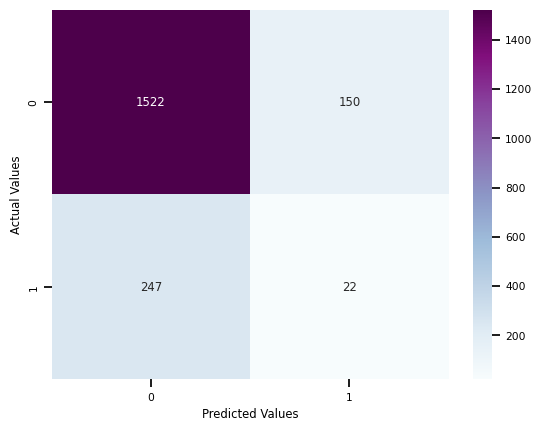

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1672
           1       0.13      0.08      0.10       269

    accuracy                           0.80      1941
   macro avg       0.49      0.50      0.49      1941
weighted avg       0.76      0.80      0.78      1941

Accuracy of the model:  0.7954662545079856


In [443]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [445]:
from xgboost import XGBClassifier

model_XGBoost = XGBClassifier(n_estimator = 100, random_state = 10)

model_XGBoost.fit(X_train, Y_train)
Y_pred = model_XGBoost.predict(X_test)

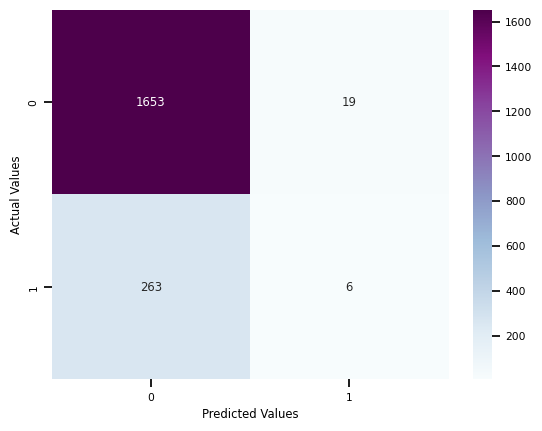

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1672
           1       0.24      0.02      0.04       269

    accuracy                           0.85      1941
   macro avg       0.55      0.51      0.48      1941
weighted avg       0.78      0.85      0.80      1941

Accuracy of the model:  0.8547140649149922


In [447]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [449]:
# Smote

In [451]:
import imblearn

In [453]:
X = new_df.values[:, :-1]
Y = new_df.values[:, -1]

In [455]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [457]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [461]:
print("Before Oversampling, count of label '1': ", (sum(Y_train==1)))
print("Before Oversampling, count of label '0': ", (sum(Y_train==0)))

Before Oversampling, count of label '1':  893
Before Oversampling, count of label '0':  5897


In [463]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print("After Oversampling, the shape of train_X: ", (X_train_res.shape))
print("After Oversampling, the shape of train_y: ", (Y_train_res.shape))

After Oversampling, the shape of train_X:  (11794, 9)
After Oversampling, the shape of train_y:  (11794,)


In [465]:
print("After Oversampling, count of label '1': ", (sum(Y_train_res==1)))
print("After Oversampling, count of label '0': ", (sum(Y_train_res==0)))

After Oversampling, count of label '1':  5897
After Oversampling, count of label '0':  5897


In [467]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=50, random_state=10)

model_RandomForest.fit(X_train_res, Y_train_res)
Y_pred = model_RandomForest.predict(X_test)

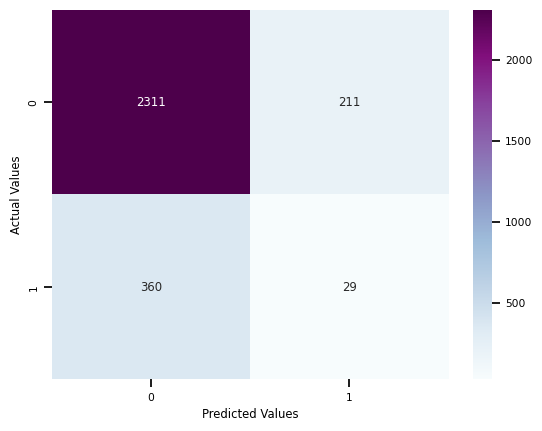

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      2522
         1.0       0.12      0.07      0.09       389

    accuracy                           0.80      2911
   macro avg       0.49      0.50      0.49      2911
weighted avg       0.77      0.80      0.78      2911

Accuracy of the model:  0.8038474750944693


In [469]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [471]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50, random_state=10)

model_ExtraTrees.fit(X_train_res, Y_train_res)
Y_pred = model_ExtraTrees.predict(X_test)

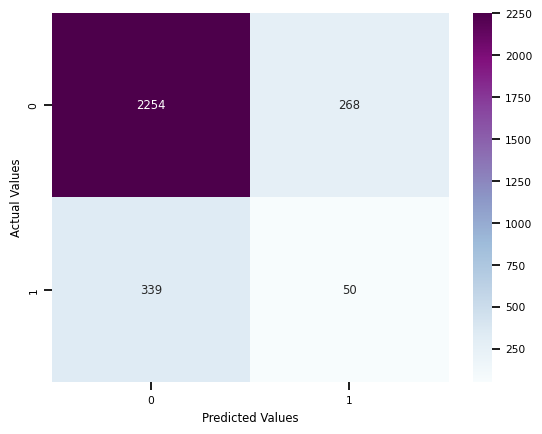

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2522
         1.0       0.16      0.13      0.14       389

    accuracy                           0.79      2911
   macro avg       0.51      0.51      0.51      2911
weighted avg       0.77      0.79      0.78      2911

Accuracy of the model:  0.7914805908622466


In [473]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [475]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10), 
                                    n_estimators=100, random_state=10)

model_AdaBoost.fit(X_train_res, Y_train_res)

Y_pred = model_AdaBoost.predict(X_test)

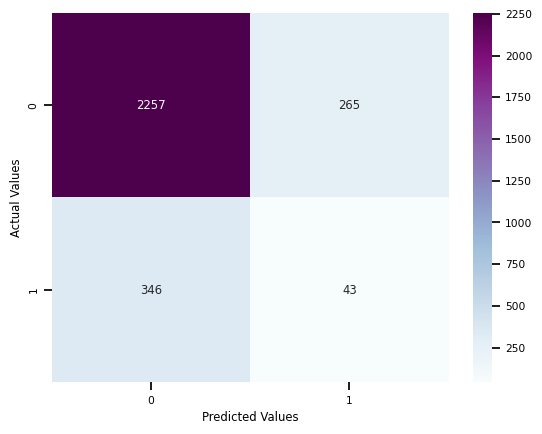

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2522
         1.0       0.14      0.11      0.12       389

    accuracy                           0.79      2911
   macro avg       0.50      0.50      0.50      2911
weighted avg       0.77      0.79      0.78      2911

Accuracy of the model:  0.790106492614222


In [477]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [479]:
from xgboost import XGBClassifier

model_XGBoost = XGBClassifier(n_estimator = 500, random_state = 10)

model_XGBoost.fit(X_train_res, Y_train_res)
Y_pred = model_XGBoost.predict(X_test)

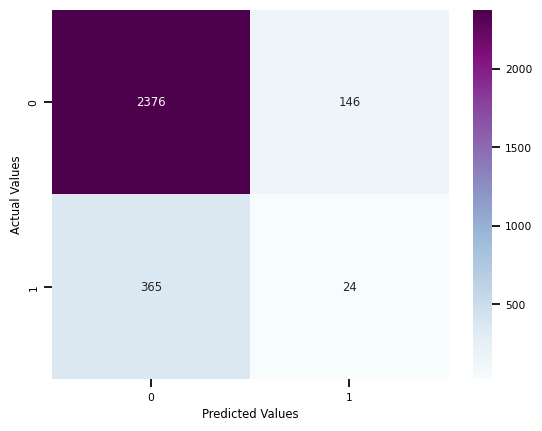

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2522
         1.0       0.14      0.06      0.09       389

    accuracy                           0.82      2911
   macro avg       0.50      0.50      0.49      2911
weighted avg       0.77      0.82      0.79      2911

Accuracy of the model:  0.8244589488148403


In [481]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [483]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_res, Y_train_res)

Y_pred = classifier.predict(X_test)

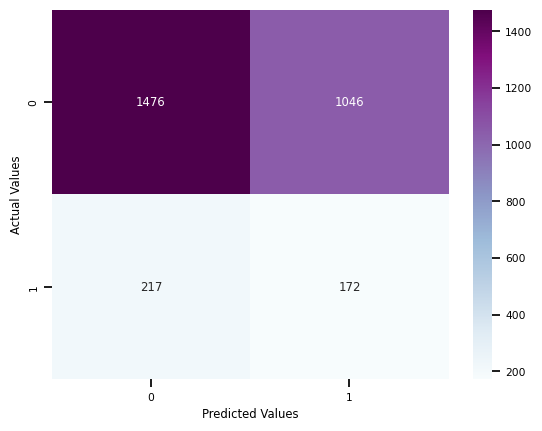

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70      2522
         1.0       0.14      0.44      0.21       389

    accuracy                           0.57      2911
   macro avg       0.51      0.51      0.46      2911
weighted avg       0.77      0.57      0.64      2911

Accuracy of the model:  0.5661284781861903


In [485]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [487]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=0.1, C=1)
classifier.fit(X_train_res, Y_train_res)

Y_pred = classifier.predict(X_test)

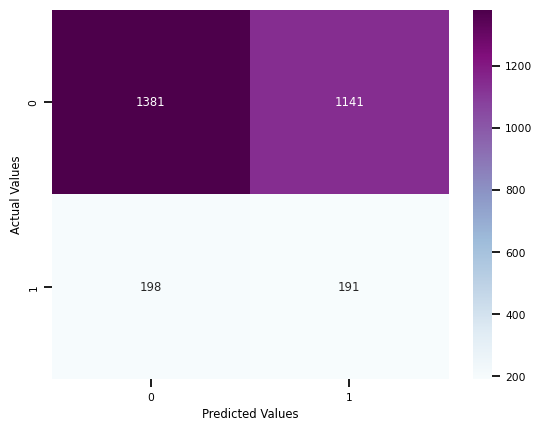

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.55      0.67      2522
         1.0       0.14      0.49      0.22       389

    accuracy                           0.54      2911
   macro avg       0.51      0.52      0.45      2911
weighted avg       0.78      0.54      0.61      2911

Accuracy of the model:  0.5400206114737204


In [489]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [519]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=7,
                                metric = 'euclidean')
model_KNN.fit(X_train_res, Y_train_res)
Y_pred = model_KNN.predict(X_test)

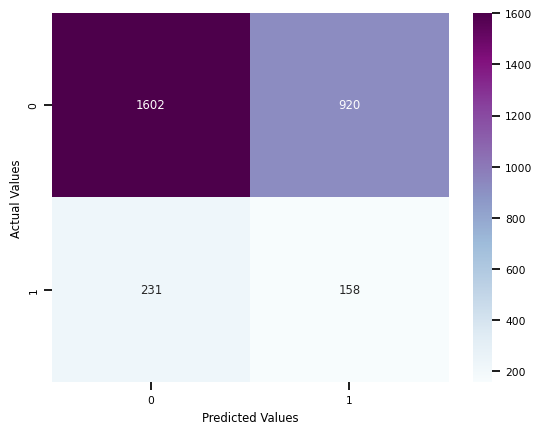

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74      2522
         1.0       0.15      0.41      0.22       389

    accuracy                           0.60      2911
   macro avg       0.51      0.52      0.48      2911
weighted avg       0.78      0.60      0.67      2911

Accuracy of the model:  0.6046032291308828


In [521]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot = True, fmt = 'g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report")

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

In [523]:
# from above models different 
# models buildup on the data we can obsere that 
# logistic regression and KNN was working better in terms of recall even if the accuracy was not good.
# from logistic & knn model, we will choose the knn model as its recall was good enough as compared to other models. Type 1 & type 2 
# errors were also seemed to be comparatively good with respect to other models.